# Lost sales estimation

In [21]:
import sys
sys.path.append('D:/source/repos')
from utilities.std_imports import *

### Function

In [93]:
def lost_sales_estim(dmd, stk, mw):
    if(len(dmd) != len(stk)): raise exception('Dmd and stk have to be the same size')
    dmd = pd.Series(dmd)
    stk = pd.Series(stk)

    llf_thres = 0.5
    n = len(dmd)
    
    #mobile mean, stDev
    mean = dmd.rolling(window=mw, center=True).mean()
    stDev = dmd.rolling(window=mw, center=True).std()

    #U estimation
    U = np.zeros(n)
    S = np.zeros(n)
    for t in range(n):
        U[t] = (stk[t] - mean[t]) / stDev[t]
        S[t] = mean[t] + E(U[t]) * stDev[t]


    #lost sales estimation
    stockouts = 0;
    halfMw = (int)(mw/2.0)
    usd = []
    for i in range(n):
        if stk[i] == 0 and dmd[i] >= 0 and i >= mw and left_load_factor(dmd, i) > llf_thres:
            s = S[i] - dmd[i]
            if s > 0:  usd.append(round(s,2)) 
            else:  usd.append(0)
            stockouts += 1

        else:
            usd.append(0)

    return usd



def E(U):
    if U < -1.2 : return 0.23 * U + 0.652  
    elif U < -0.1 : return 0.50 * U + 0.965  
    elif U < 1.2 : return 0.72 * U + 0.996  
    return 0.87 * U + 0.803 

def left_load_factor(ts, idx):
    has_sales = ts.copy()
    has_sales[has_sales>0][:idx] = 1
    return round(has_sales.mean(),2)

### Testing

In [94]:
dmd =  [10, 30, 30, 40, 30, 20, 40, 40, 50, 60, 70, 90,  10,  30, 110, 100, 80, 60, 40, 60, 40,  30, 150, 160]
stk =  [3,   4,  5,  4,  6,  4,  6,  6,  7,  8,  0,  0,   0,   0,  13,  10,  0,  7,  9,  6,  0,   0,   0,  16]

In [95]:
ls = lost_sales_estim(dmd=dmd, stk=stk, mw=3)
dmdls = np.add(dmd, ls)

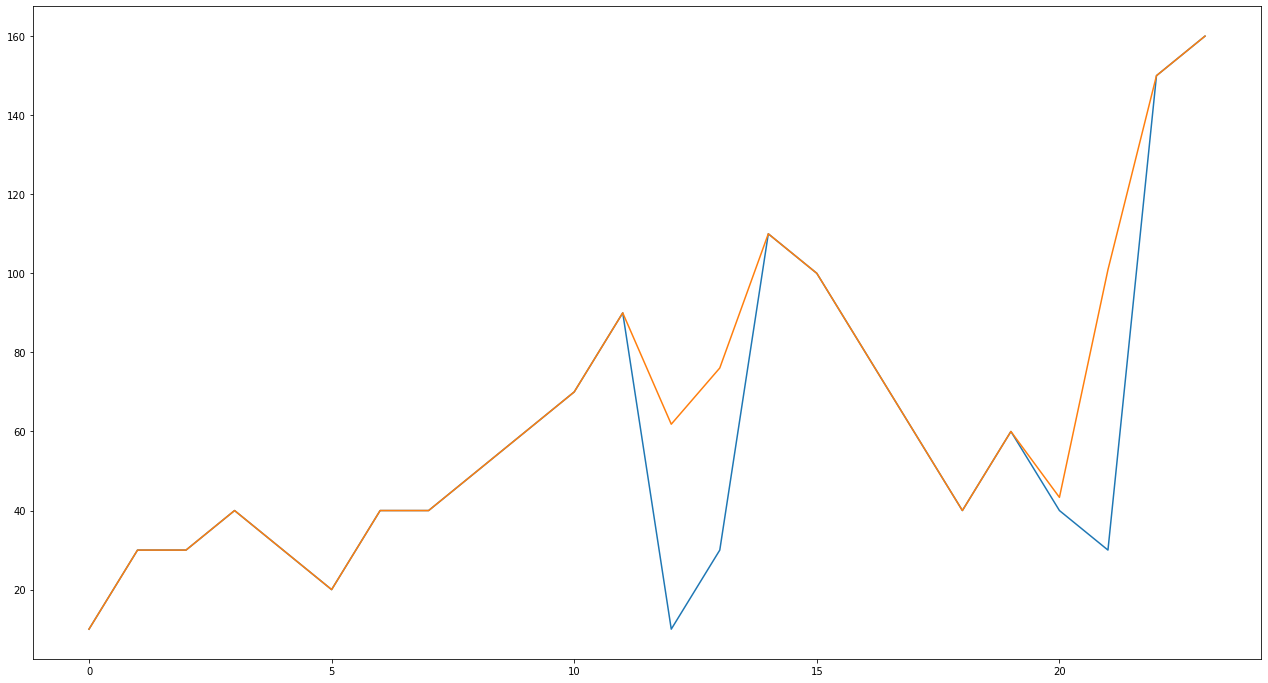

In [96]:
plt.figure(figsize=[22,12])
plt.plot(dmd)
plt.plot(dmdls);